In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier

In [30]:
data_created = pd.read_csv("./../result/data_created.csv")

In [31]:
data_created.head()

,PID,ActivityNumber,group,mvm,sdvm,df,p625,fpdf,mangle,sdangle
0,3,1,0,10.212443,0.177938,6.2,0.149488,0.019942,-12.444212,0.851601
1,3,1,0,10.218438,0.378222,1.8,0.262213,0.020963,-12.031269,2.009492
2,3,1,0,10.212566,0.174238,4.3,0.114015,0.025539,-12.696323,0.595054
3,3,2,0,10.143824,0.188727,3.0,0.226976,0.018592,-4.512657,2.094529
4,3,2,0,10.146730,0.098754,1.8,0.178275,0.021329,-3.473577,0.363055


In [46]:
X = data_created.loc[:, ["mvm", "sdvm", "df", "p625", "fpdf", "mangle", "sdangle"]]
Y = data_created.loc[:, "group"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 123, shuffle=True)

In [33]:
# RF + GridSearch
params = {
    'n_estimators' : [100, 200, 300, 400],
    'max_depth' : [10, 20, 30, 40, 50],
    'min_samples_split' : [1, 2, 3, 4],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}
rf = RandomForestClassifier()
RF_gs = GridSearchCV(estimator=rf, param_grid=params, scoring='roc_auc', cv = 5,verbose=10)
RF_gs.fit(X_train, y_train)
estimator = RF_gs.best_estimator_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/Users/bai_chen/opt/anaconda3/lib/pyt

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100, score=nan, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200 


/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200 


/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=200, score=nan, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300 


/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300, score=nan, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300, score=nan, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300 


/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300, score=nan, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300 


/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300, score=nan, total=   0.3s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300, score=nan, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=400 


/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=400, score=nan, total=   0.4s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=400 


/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=400, score=nan, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=400 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=400, score=nan, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=400 


/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=400, score=nan, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=400 


/Users/bai_chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=400, score=nan, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


KeyboardInterrupt: 

In [34]:
clfs = []
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

clfs.append(lr)
clfs.append(svm)
clfs.append(rf)
clfs.append(dt)

In [35]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()),  # normalize data
    ('clf', SVC())  # fit Logistic regression model
])

-----------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy 1.000000
F1-score 1.000000


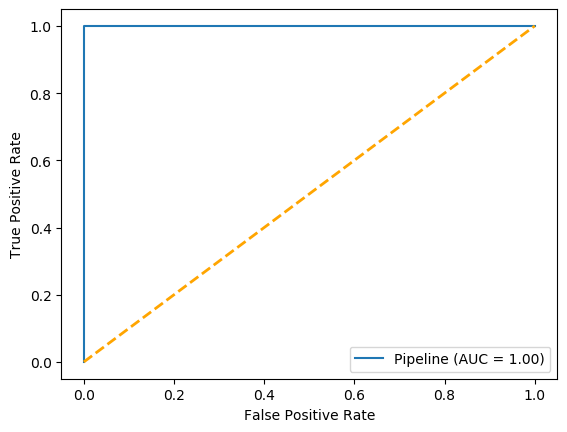

-----------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy 1.000000
F1-score 1.000000


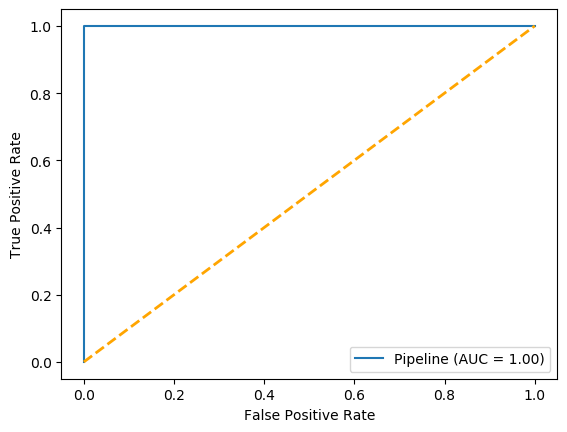

-----------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy 0.993421
F1-score 0.989011


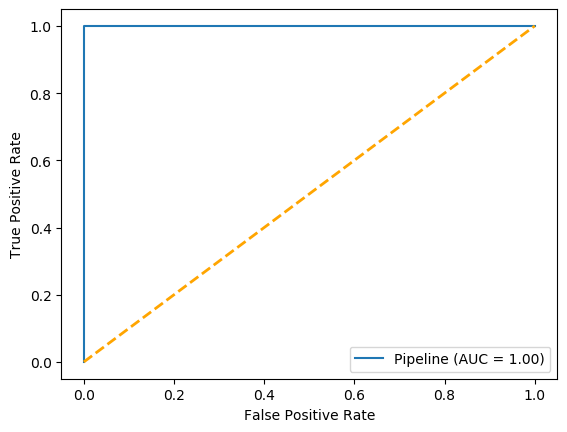

-----------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy 0.973684
F1-score 0.954545


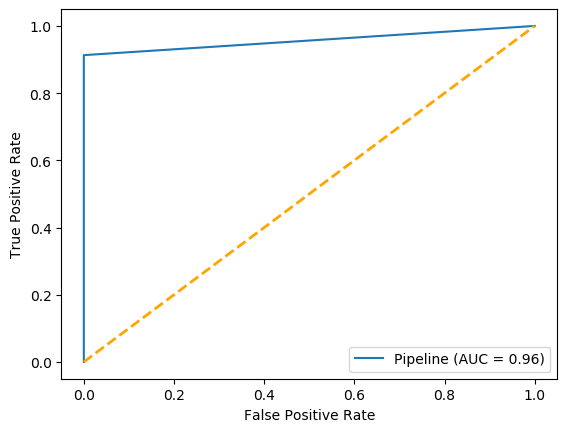

In [36]:
for clf in clfs:
    pipeline.set_params(clf =  clf)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    #y_score = pipeline.decision_function(X_test)
    print("-----------------------------------------")
    print(str(clf))
    print("Accuracy %f"%acc)
    print("F1-score %f"%f1)
    clf_disp = plot_roc_curve(pipeline, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    plt.show()

In [37]:
X_r = PCA(n_components=2).fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_r, Y, test_size = 0.4, random_state = 123, shuffle=True)

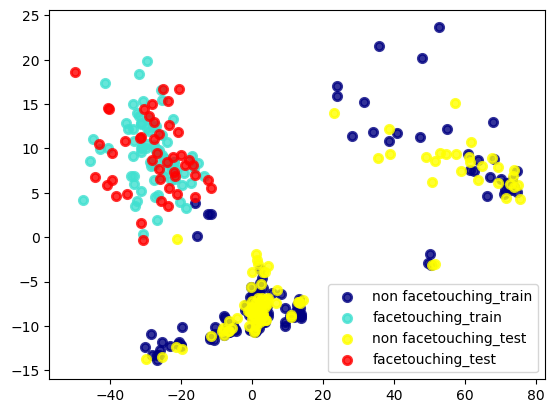

In [39]:
colors = ['navy', 'turquoise']
colors_test = ['yellow', 'red']
lw = 2
target_names = ['non facetouching_train', 'facetouching_train']
target_names_test = ['non facetouching_test', 'facetouching_test']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], 
                color=color, alpha=.8, lw=lw,
                label=target_name)
for color, i, target_name in zip(colors_test, [0, 1], target_names_test):
    plt.scatter(X_test[y_test==i, 0], X_test[y_test==i, 1], 
                color=color, alpha=.8, lw=lw,
                label=target_name)

    
plt.legend(loc='best', shadow=False)

-----------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy 1.000000
F1-score 1.000000


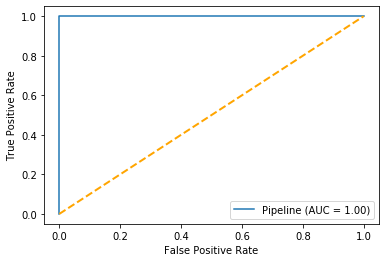

-----------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy 1.000000
F1-score 1.000000


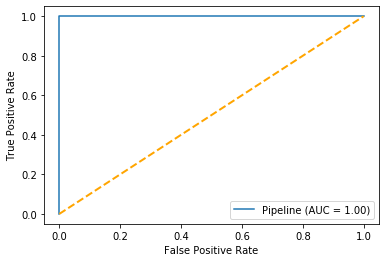

-----------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy 0.984375
F1-score 0.981132


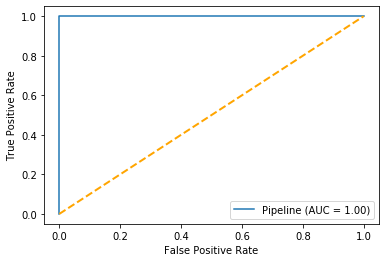

-----------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy 0.968750
F1-score 0.961538


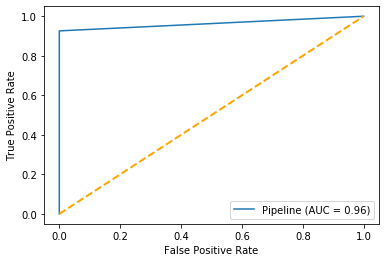

In [58]:
for clf in clfs:
    pipeline.set_params(clf =  clf)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    #y_score = pipeline.decision_function(X_test)
    print("-----------------------------------------")
    print(str(clf))
    print("Accuracy %f"%acc)
    print("F1-score %f"%f1)
    clf_disp = plot_roc_curve(pipeline, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    plt.show()

In [47]:
# calculate feature importance of random forest classifer
clf = RandomForestClassifier()
pipeline = Pipeline([
    ('normalizer', StandardScaler()),  # normalize data
    ('clf', clf)  # fit Logistic regression model
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('normalizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [48]:
importances = pipeline['clf'].feature_importances_
features = ['mvm', "sdvm", "df", "p625", "fpdf", "mangle", "sdangle"]
imp_dict = {
    'feature' : features,
    'importance' : importances
}
df_imp = pd.DataFrame.from_dict(imp_dict)
df_imp = df_imp.sort_values(by = ['importance'], ascending=False)

feature mangle (0.279422)
feature sdangle (0.322126)
feature fpdf (0.093259)
feature mvm (0.041839)
feature df (0.107302)
feature sdvm (0.039198)
feature p625 (0.116853)


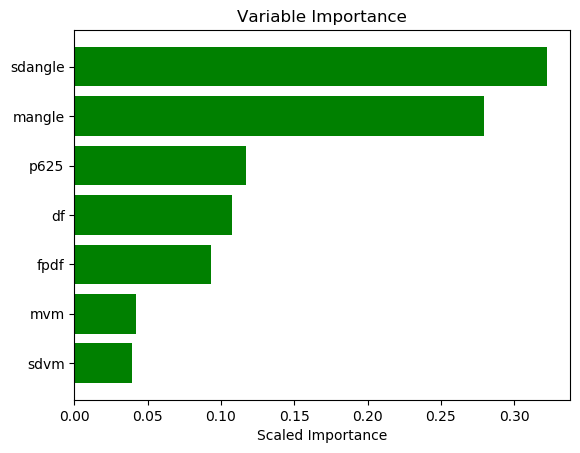

In [49]:
for f in range(X.shape[1]):
    print("feature %s (%f)" % (features[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(7)
ax.barh(y_pos, df_imp.importance, align = 'center', color = 'green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(df_imp.feature)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

In [91]:
# nested cross validation for Random Forest model
data_created = pd.read_csv("./../result/data_created.csv")

X = data_created.loc[:, ["mvm", "sdvm", "df", "p625", "fpdf", "mangle", "sdangle"]]
y = data_created.loc[:, "group"]

# configure the cross-validation procedure
cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)
params = {
    'n_estimators' : [50, 100, 150, 200],
    'max_features' : ["auto", "sqrt", "log2"],
    'min_samples_leaf' : [1, 3, 5]
}

search = GridSearchCV(model, param_grid=params, scoring="accuracy",
                      n_jobs=1, cv = cv_inner, refit=True, verbose=10)
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
scores_rf = cross_validate(search, X, y, scoring = ["accuracy", "f1", "recall", "precision", "roc_auc"], 
                           return_train_score = True, cv=cv_outer, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.8min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


In [93]:
print("Accuracy on Training set: ", np.mean(scores_rf['train_accuracy']))
print("Accuracy on Test set: ", np.mean(scores_rf['test_accuracy']))
print("F1 score on Training set: ", np.mean(scores_rf['train_f1']))
print("F1 score on Test set: ", np.mean(scores_rf['test_f1']))
print("Precision on Training set: ", np.mean(scores_rf['train_precision']))
print("Precision on Test set: ", np.mean(scores_rf['test_precision']))
print("Recall on Training set: ", np.mean(scores_rf['train_recall']))
print("Recall on Test set: ", np.mean(scores_rf['test_recall']))
print("ROC-AUC on Training set: ", np.mean(scores_rf['train_roc_auc']))
print("ROC-AUC on Test set: ", np.mean(scores_rf['test_roc_auc']))

Accuracy on Training set:  1.0
Accuracy on Test set:  0.9921052631578948
F1 score on Training set:  1.0
F1 score on Test set:  0.9870155038759691
Precision on Training set:  1.0
Precision on Test set:  0.990909090909091
Recall on Training set:  1.0
Recall on Test set:  0.984
ROC-AUC on Training set:  1.0
ROC-AUC on Test set:  1.0


In [96]:
# Logistic Regression
# configure the cross-validation procedure
cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
# define the model
model = Pipeline([('normalizer', StandardScaler()),  # normalize data
                  ('clf', LogisticRegression(random_state=1))  # fit Logistic regression model
])

params = {
    'clf__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'clf__penalty' : ["l2"],
    'clf__C' : [100, 10, 1.0, 0.1, 0.01]
}

search = GridSearchCV(model, param_grid=params, scoring="accuracy",
                      n_jobs=1, cv = cv_inner, refit=True, verbose=10)

cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# scores for logistic regression
scores_lr = cross_validate(search, X, y, scoring = ["accuracy", "f1", "recall", "precision", "roc_auc"], 
                           return_train_score = True, cv=cv_outer, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


In [97]:
print("Accuracy on Training set: ", np.mean(scores_lr['train_accuracy']))
print("Accuracy on Test set: ", np.mean(scores_lr['test_accuracy']))
print("F1 score on Training set: ", np.mean(scores_lr['train_f1']))
print("F1 score on Test set: ", np.mean(scores_lr['test_f1']))
print("Precision on Training set: ", np.mean(scores_lr['train_precision']))
print("Precision on Test set: ", np.mean(scores_lr['test_precision']))
print("Recall on Training set: ", np.mean(scores_lr['train_recall']))
print("Recall on Test set: ", np.mean(scores_lr['test_recall']))
print("ROC-AUC on Training set: ", np.mean(scores_lr['train_roc_auc']))
print("ROC-AUC on Test set: ", np.mean(scores_lr['test_roc_auc']))

Accuracy on Training set:  1.0
Accuracy on Test set:  0.9973684210526315
F1 score on Training set:  1.0
F1 score on Test set:  0.9953488372093023
Precision on Training set:  1.0
Precision on Test set:  0.990909090909091
Recall on Training set:  1.0
Recall on Test set:  1.0
ROC-AUC on Training set:  1.0
ROC-AUC on Test set:  1.0


In [98]:
# Support Vector Machine
# configure the cross-validation procedure
cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
# define the model
model = Pipeline([('normalizer', StandardScaler()),  # normalize data
                  ('clf', SVC(random_state=1))  # fit Logistic regression model
])


params = {
    'clf__kernel' : ['poly', 'rbf', 'sigmoid'],
    'clf__gamma' : ["scale"],
    'clf__C' : [50, 10, 1.0, 0.1, 0.01]
}

search = GridSearchCV(model, param_grid=params, scoring="accuracy",
                      n_jobs=1, cv = cv_inner, refit=True, verbose=10)

cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# scores for logistic regression
scores_svm = cross_validate(search, X, y, scoring = ["accuracy", "f1", "recall", "precision", "roc_auc"], 
                            return_train_score = True, cv=cv_outer, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


In [99]:
print("Accuracy on Training set: ", np.mean(scores_svm['train_accuracy']))
print("Accuracy on Test set: ", np.mean(scores_svm['test_accuracy']))
print("F1 score on Training set: ", np.mean(scores_svm['train_f1']))
print("F1 score on Test set: ", np.mean(scores_svm['test_f1']))
print("Precision on Training set: ", np.mean(scores_svm['train_precision']))
print("Precision on Test set: ", np.mean(scores_svm['test_precision']))
print("Recall on Training set: ", np.mean(scores_svm['train_recall']))
print("Recall on Test set: ", np.mean(scores_svm['test_recall']))
print("ROC-AUC on Training set: ", np.mean(scores_svm['train_roc_auc']))
print("ROC-AUC on Test set: ", np.mean(scores_svm['test_roc_auc']))

Accuracy on Training set:  1.0
Accuracy on Test set:  0.9921052631578948
F1 score on Training set:  1.0
F1 score on Test set:  0.9873488372093023
Precision on Training set:  1.0
Precision on Test set:  0.9829090909090908
Recall on Training set:  1.0
Recall on Test set:  0.992
ROC-AUC on Training set:  1.0
ROC-AUC on Test set:  0.9998431372549019


In [104]:
# Decision Tree
# configure the cross-validation procedure
cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
# define the model
model = DecisionTreeClassifier(random_state=1)

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12],
    'min_samples_leaf' : [6, 8]
}

search = GridSearchCV(model, param_grid=params, scoring="accuracy",
                      n_jobs=1, cv = cv_inner, refit=True, verbose=10)

cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# scores for logistic regression
scores_dt = cross_validate(search, X, y, scoring = ["accuracy", "f1", "recall", "precision", "roc_auc"],
                            cv=cv_outer, n_jobs=-1, return_train_score = True, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


In [105]:
print("Accuracy on Training set: ", np.mean(scores_dt['train_accuracy']))
print("Accuracy on Test set: ", np.mean(scores_dt['test_accuracy']))
print("F1 score on Training set: ", np.mean(scores_dt['train_f1']))
print("F1 score on Test set: ", np.mean(scores_dt['test_f1']))
print("Precision on Training set: ", np.mean(scores_dt['train_precision']))
print("Precision on Test set: ", np.mean(scores_dt['test_precision']))
print("Recall on Training set: ", np.mean(scores_dt['train_recall']))
print("Recall on Test set: ", np.mean(scores_dt['test_recall']))
print("ROC-AUC on Training set: ", np.mean(scores_dt['train_roc_auc']))
print("ROC-AUC on Test set: ", np.mean(scores_dt['test_roc_auc']))

Accuracy on Training set:  0.9907655897168665
Accuracy on Test set:  0.9868421052631579
F1 score on Training set:  0.9850897542523158
F1 score on Test set:  0.977988516031651
Precision on Training set:  0.9937902827352267
Precision on Test set:  0.990909090909091
Recall on Training set:  0.9766584709255994
Recall on Test set:  0.9665007680491552
ROC-AUC on Training set:  0.9980535404619986
ROC-AUC on Test set:  0.9891846193022664
